# Queueing theory - M/M/1 example

### 1. Imports

In [1]:
import openqtsim

### 2. Prepare inputs

In [2]:
# Basic input
Lambda = 8
Mu = 9

#### Define the queue object input

In [3]:
# Create Arrival and Service processes and specify the number of servers
A = openqtsim.ArrivalProcess("M", arr_rate=Lambda)
S = openqtsim.ServiceProcess("M", srv_rate=Mu)
c = 1

#### Create the queue object and use it to create a simulating object

In [4]:
# Create the queue object and use it to create a simulating object
q = openqtsim.Queue(A, S, c)
q.kendall_notation

'M/M/1/inf/inf/FIFO'

### 3. Run the simulation

In [5]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
print('')

sim = openqtsim.Simulation(q)
sim.run(10000) 

Start simulation of "M/M/1/inf/inf/FIFO" queue

Wall time: 1.65 s


In [6]:
sim.get_stats()
print('Input IAT: {:.4f}'.format(1/Lambda))
print('Input ST: {:.4f}'.format(1/Mu))

# check at: https://www.supositorio.com/rcalc/rcalclite.htm

Waiting time over service time: 7.3386

Rho: server utilisation: 0.8840
P_0: probability nobody in the system: 0.1160

L_s: average nr of customers in the system: 7.765911704414779
L_q: average nr of customers in the queue: 6.823208839558022
W_s: the long term average time spent in the system: 0.9148
W_q: the long term average time spent in the queue: 0.8051

IAT: average inter arrival time: 0.1241
ST: average service time: 0.1097

Input IAT: 0.1250
Input ST: 0.1111


**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average time spent in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

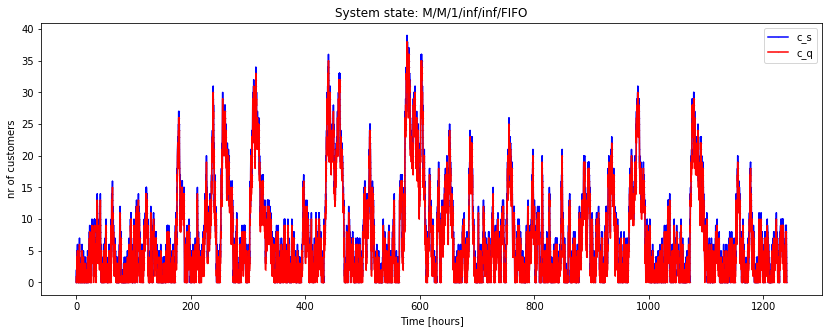

In [7]:
sim.plot_system_state()

In [8]:
df, df_sys = sim.return_log()

In [9]:
df.head(10)

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,s_id
0,1,0.021267,0.117101,0.021267,0.021267,0.138368,0.117101,0.000000,0.021267,1
1,2,0.071113,0.007456,0.092380,0.138368,0.145825,0.053445,0.045989,0.000000,1
2,3,0.231819,0.231480,0.324198,0.324198,0.555678,0.231480,0.000000,0.178374,1
3,4,0.170969,0.079259,0.495167,0.555678,0.634936,0.139769,0.060511,0.000000,1
4,5,0.171649,0.049475,0.666816,0.666816,0.716292,0.049475,0.000000,0.031880,1
5,6,0.089004,0.481778,0.755821,0.755821,1.237599,0.481778,0.000000,0.039529,1
6,7,0.127874,0.042341,0.883695,1.237599,1.279940,0.396245,0.353904,0.000000,1
7,8,0.110669,0.208458,0.994364,1.279940,1.488398,0.494034,0.285576,0.000000,1
8,9,0.090079,0.014054,1.084443,1.488398,1.502452,0.418008,0.403955,0.000000,1
9,10,0.060657,0.041252,1.145100,1.502452,1.543704,0.398604,0.357352,0.000000,1


In [10]:
df_sys.head(10)

,t,c_s,c_q
0,0.000000,0,0
1,0.021267,1,0
2,0.092380,2,1
3,0.138368,1,0
4,0.145825,0,0
5,0.324198,1,0
6,0.495167,2,1
7,0.555678,1,0
8,0.634936,0,0
9,0.666816,1,0


## Sandbox